In [1]:

!python -m spacy download fr_core_news_sm

2023-12-06 14:18:58.114713: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-06 14:18:58.114783: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-06 14:18:58.114834: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-06 14:18:58.129135: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-06 14:19:00.718271: W tensorflow/compiler/

In [2]:
import spacy


In [3]:
nlp = spacy.load("fr_core_news_sm") #changer la langue en francais


In [4]:
print(nlp.pipe_names)

['tok2vec', 'morphologizer', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']


In [5]:
nlp.add_pipe("token_splitter")#segment the text en entree de mots
nlp.add_pipe("sentencizer")# do segmentation en entree en phrases
print(nlp.pipe_names)

['tok2vec', 'morphologizer', 'parser', 'attribute_ruler', 'lemmatizer', 'ner', 'token_splitter', 'sentencizer']


In [6]:
txt=nlp("""Le Massachusetts Institute of Technology (MIT), en français Institut de technologie du Massachusetts, est un institut de recherche américain et une université, spécialisé dans les domaines de la science et de la technologie. Établissement privé situé à Cambridge, dans l'État du Massachusetts, à proximité immédiate de Boston, au Nord-Est des États-Unis, le MIT est considéré comme une des meilleures universités du monde (classée première par Quacquarelli Symonds en 20241).

Il édite la Technology Review, une revue scientifique consacrée aux sciences de l'ingénieur et à l'innovation.""")

#https://spacy.io/api/sentencizer
print(list(txt.sents)[0])#first sentence
print(list(txt.sents)[1])#second sentence
print(list(txt.sents)[2])#third sentence

#https://spacy.io/api/tokenizer
print(txt[0],txt[1],txt[2])#first 3 words(tokens)


Le Massachusetts Institute of Technology (MIT), en français Institut de technologie du Massachusetts, est un institut de recherche américain et une université, spécialisé dans les domaines de la science et de la technologie.
Établissement privé situé à Cambridge, dans l'État du Massachusetts, à proximité immédiate de Boston, au Nord-Est des États-Unis, le MIT est considéré comme une des meilleures universités du monde (classée première par Quacquarelli Symonds en 20241).


Il édite la Technology Review, une revue scientifique consacrée aux sciences de l'ingénieur et à l'innovation.
Le Massachusetts Institute


In [7]:
for word in txt[0:3]:#vocabulaire=ensemble des lexeme ou ensemble des terms
  lexeme=txt.vocab[word.text]#lexeme unite dentre dans le vocabulaire
  print(lexeme.text,lexeme.shape_,lexeme.prefix_,lexeme.suffix_,lexeme.is_alpha,lexeme.is_digit,lexeme.is_title,lexeme.lang_)

  #la langue est detecter en francais c'est pour ca qu'on trouve fr au lieu du en

Le Xx L Le True False True fr
Massachusetts Xxxxx M tts True False True fr
Institute Xxxxx I ute True False True fr


In [8]:
for word in txt[0:20]:
  print(f'{word.text:{15}}{word.lemma_:{15}}{word.pos_:{8}}{word.tag_:{8}}{spacy.explain(word.pos_)}:{20}{word.dep_:{8}}')
# en francais intitute est considerer comme un  name au lieu du propn, et massachussets est considerer comme nsubj au lieu du compound

Le             le             DET     DET     determiner:20det     
Massachusetts  Massachusetts  PROPN   PROPN   proper noun:20nsubj   
Institute      institut       NOUN    NOUN    noun:20flat:name
of             of             ADP     ADP     adposition:20case    
Technology     Technology     PROPN   PROPN   proper noun:20nmod    
(              (              PUNCT   PUNCT   punctuation:20punct   
MIT            mit            NOUN    NOUN    noun:20appos   
)              )              PUNCT   PUNCT   punctuation:20punct   
,              ,              PUNCT   PUNCT   punctuation:20punct   
en             en             ADP     ADP     adposition:20case    
français       français       ADJ     ADJ     adjective:20nmod    
Institut       Institut       PROPN   PROPN   proper noun:20conj    
de             de             ADP     ADP     adposition:20case    
technologie    technologie    NOUN    NOUN    noun:20nmod    
du             de             ADP     ADP     adposition:20c

In [9]:
from spacy import displacy

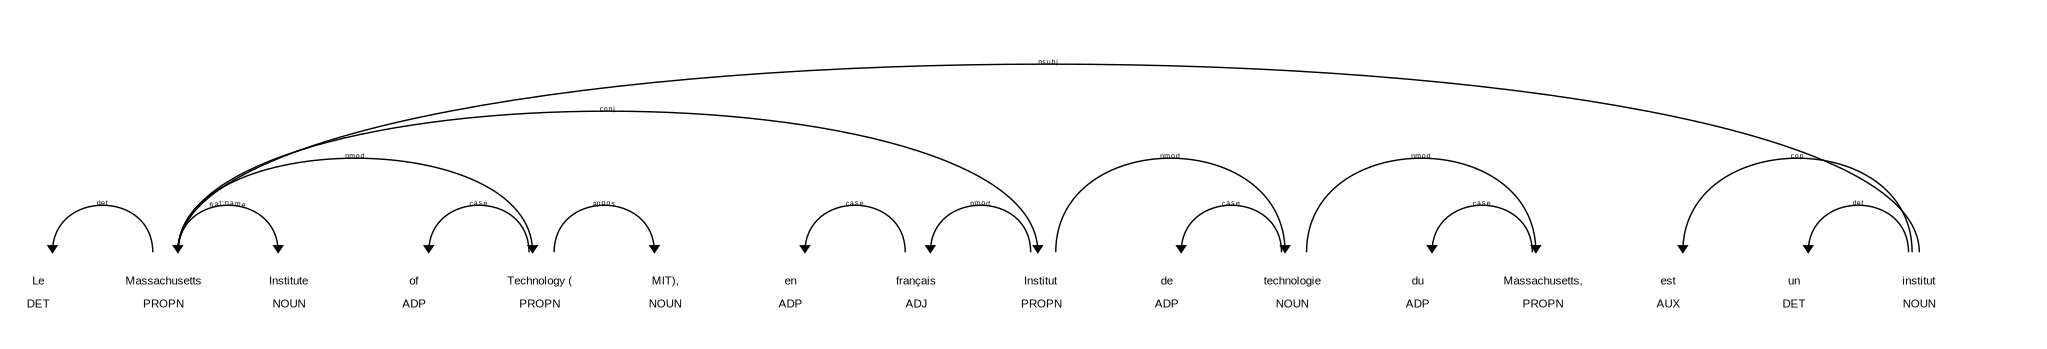

In [10]:
span=txt[0:20]
deptree=displacy.render(span,style="dep")
from IPython.core.display import SVG
SVG(deptree)

In [11]:
for chunk in span.noun_chunks:
  print(f'{chunk.text:{50}}{chunk.root.text:{15}}{chunk.root.dep_:{8}}{chunk.root.head.text:{15}}')


Le Massachusetts Institute of Technology (MIT), en français Institut de technologie du MassachusettsMassachusetts  nsubj   institut       


In [12]:
from spacy.matcher import Matcher
matcher=Matcher(nlp.vocab)
pattern=[{'POS':'PROPN','OP':'+','IS_PUNCT':False}]
matcher.add("ORG1",[pattern])
matches=matcher(txt)
print(len(matches))
for match in matches[:10]:
  print(match,txt[match[1]:match[2]])
matcher2=Matcher(nlp.vocab)
matcher2.add("ORG2",[pattern],greedy='LONGEST')
matches=matcher2(txt)
print(len(matches))

for match in matches[:20]:
  print(match,txt[match[1]:match[2]])

12
(6582767286935887348, 1, 2) Massachusetts
(6582767286935887348, 4, 5) Technology
(6582767286935887348, 11, 12) Institut
(6582767286935887348, 15, 16) Massachusetts
(6582767286935887348, 43, 44) Cambridge
(6582767286935887348, 49, 50) Massachusetts
(6582767286935887348, 55, 56) Boston
(6582767286935887348, 60, 61) États-Unis
(6582767286935887348, 63, 64) MIT
(6582767286935887348, 87, 88) Technology
10
(2631470707395093984, 87, 89) Technology Review
(2631470707395093984, 1, 2) Massachusetts
(2631470707395093984, 4, 5) Technology
(2631470707395093984, 11, 12) Institut
(2631470707395093984, 15, 16) Massachusetts
(2631470707395093984, 43, 44) Cambridge
(2631470707395093984, 49, 50) Massachusetts
(2631470707395093984, 55, 56) Boston
(2631470707395093984, 60, 61) États-Unis
(2631470707395093984, 63, 64) MIT


In [13]:
for ent in span.ents:
  print(f'{ent.text:{50}} {ent.label_:{15}} {spacy.explain(ent.label_)}')
SVG(displacy.render(span,style="ent"))
# "Le" n'est pas considerer avec entite : Massachusetts Institute of Technology

Massachusetts Institute of Technology              ORG             Companies, agencies, institutions, etc.
MIT                                                ORG             Companies, agencies, institutions, etc.
Institut de technologie du Massachusetts           ORG             Companies, agencies, institutions, etc.


In [14]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [15]:
from nltk import download
download("punkt")
from nltk import sent_tokenize
from nltk import word_tokenize
from nltk.tag import StanfordNERTagger

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [16]:
!gdown https://drive.google.com/uc?id=1awiicAIymP4zpP6XPxdF2dWgF7yCQDZY
!gdown https://drive.google.com/uc?id=1zlo3vy9HcMiAqxVKuGNX_ejA5KonqMae


Downloading...
From: https://drive.google.com/uc?id=1awiicAIymP4zpP6XPxdF2dWgF7yCQDZY
To: /content/stanford-ner-4.2.0.jar
100% 4.66M/4.66M [00:00<00:00, 259MB/s]
Downloading...
From: https://drive.google.com/uc?id=1zlo3vy9HcMiAqxVKuGNX_ejA5KonqMae
To: /content/english.all.3class.distsim.crf.ser.gz
100% 34.7M/34.7M [00:00<00:00, 233MB/s]


In [17]:
ner3 = StanfordNERTagger("/content/english.all.3class.distsim.crf.ser.gz",
                         path_to_jar="/content/stanford-ner-4.2.0.jar")
sentences = sent_tokenize(txt.text)
tokenized_sentences=[word_tokenize(sentence) for sentence in sentences]
for sent in tokenized_sentences[:3]:
  print(sent)
  nerJOUT=ner3.tag(sent)
  print(nerJOUT)




['Le', 'Massachusetts', 'Institute', 'of', 'Technology', '(', 'MIT', ')', ',', 'en', 'français', 'Institut', 'de', 'technologie', 'du', 'Massachusetts', ',', 'est', 'un', 'institut', 'de', 'recherche', 'américain', 'et', 'une', 'université', ',', 'spécialisé', 'dans', 'les', 'domaines', 'de', 'la', 'science', 'et', 'de', 'la', 'technologie', '.']
[('Le', 'ORGANIZATION'), ('Massachusetts', 'ORGANIZATION'), ('Institute', 'ORGANIZATION'), ('of', 'ORGANIZATION'), ('Technology', 'ORGANIZATION'), ('(', 'O'), ('MIT', 'O'), (')', 'O'), (',', 'O'), ('en', 'O'), ('français', 'O'), ('Institut', 'O'), ('de', 'O'), ('technologie', 'O'), ('du', 'O'), ('Massachusetts', 'LOCATION'), (',', 'O'), ('est', 'O'), ('un', 'O'), ('institut', 'O'), ('de', 'O'), ('recherche', 'O'), ('américain', 'O'), ('et', 'O'), ('une', 'O'), ('université', 'O'), (',', 'O'), ('spécialisé', 'O'), ('dans', 'O'), ('les', 'O'), ('domaines', 'O'), ('de', 'O'), ('la', 'O'), ('science', 'O'), ('et', 'O'), ('de', 'O'), ('la', 'O'), (